In [1]:
! pip install nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords 
from wordcloud import WordCloud
from nltk.tokenize import WordPunctTokenizer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("yelp_dataset_review.csv")
data

,review_id,user_id,business_id,business_name,stars,text,date
0,OiiUQHpUPSIw592zKebnTg,Wshkpj8aHWuzIeca1QxWTA,R-HCwu9UbasUudG1yTM1Ow,TD Banknorth,1.0,I am positively LIVID.I went to check my accou...,2009-10-15 00:08:18
1,qHU0E4AMN9kTGAgfVZQSGQ,JjX-bYG0O5B21fklcZhmog,PGDRRyplRKHAixBZSBLseA,Mountain America Credit Union,5.0,"My business, my parents, my ex-husband, my son...",2017-10-24 21:01:03
2,OaYClWZ3UyrAWo60tGCVsg,duKhEm4zoR5G2nllvoxqgQ,ggJXlslLYndvE7n3hgJBCQ,Capital One 360 Café,4.0,I was walking on Delaware Ave looking for an A...,2009-05-23 12:02:01
3,ouear0q6Rd4LVkZhD0wJiA,1JnmT8hfK-amrWAy8D07cQ,6e85By5Jy7MMnW2cEaGv4A,Wanderwell,5.0,Both my husband and I have been working with E...,2017-01-27 19:12:40
4,EgPmY5HjAc-_kYeh7BqZnA,NgnhuUc1nVB6cVl2q9MQFg,Q1-bq8MLTht0lqFx_pYuKg,Bank of America Financial Center,4.0,"Easy in and out, tellers are great. Generally,...",2018-07-26 14:18:17
...,...,...,...,...,...,...,...
21101,SZM36hJNM-zkHe_Xox6nvQ,aj60GUduehk9BwfcRlYeJA,qkypZ-w2OALuCHNYHTvgAg,Churchill Mortgage,1.0,Stay away!!! They have no idea what they are ...,2017-03-10 01:12:53
21102,lkAxDli_5tiE8-cL3widcw,cd3e6sQ2rvip-8vAQaxJCg,HSdyCEYwjfJ_5v9poO4QAw,Servus Credit Union,1.0,If I could pick ZERO ...I'd want to choose a n...,2019-12-13 05:00:14
21103,kQl8JKMFFqkYjsoN2qMi0w,avRT9cdFOW7jIeYeZom9yA,cFDP-1jlq2pa_BPjC-wd4g,Camping World of Meridian,1.0,"I would give them a negative star rating, if I...",2021-08-31 03:47:14
21104,__92DX3T4V2x9Oi97zlgWw,8nRNsbtaudgKDqz3GMqyGQ,KQG0_Ft5HUMFEA6l5HkB6w,Camping World of Indianapolis,1.0,"im not going into the details, but this was th...",2021-10-07 23:40:48


In [4]:
df_business = pd.read_csv('yelp_business_data.csv')
df_business

,business_id,business_name,state,star_rating,review_counts,categories
0,7PDi_iyik3jraDAzWwwR4Q,Chase JP Morgan Bank Credit Card Services,DE,1.5,111,"Banks & Credit Unions, Financial Services"
1,U2Tzy6J9aAAg9pzXsgdkvg,Premier Mortgage Resources,ID,5.0,6,"Real Estate, Home Services, Financial Services..."
2,txiXR1YfMyk-5S4ZzOVIhQ,Advance Financial,TN,2.0,7,"Title Loans, Installment Loans, Financial Serv..."
3,FC6ef4rMMZKNov_-A9M6iQ,TD Bank Havertown,PA,1.5,6,"Banks & Credit Unions, Financial Services"
4,2FR-xWttfR8qaODqcuExvw,Pls Check Cashers,AZ,2.0,5,"Financial Services, Insurance, Check Cashing\/..."
...,...,...,...,...,...,...
1482,a8xu-UcgYe445IJ6SMTi9Q,Heuer Insurance Agency,NV,4.5,8,"Financial Services, Life Insurance, Insurance,..."
1483,6aYhn5Wh2qhuKe1GRdkjgw,Solar Tech Elec,FL,4.5,16,"Investing, Financial Services, Solar Installat..."
1484,Zh03lWzvIYjGu4iuwH31aA,Bank of America Financial Center,FL,1.5,10,"Banks & Credit Unions, Home Services, Mortgage..."
1485,danrUx6V6o68nAybLhrJ7A,Tucson Federal Credit Union,AZ,1.5,8,"Banks & Credit Unions, Financial Services"


In [5]:
#Check Null values in Dataframe
data.isnull().sum()

review_id        0
user_id          0
business_id      0
business_name    0
stars            0
text             0
date             0
dtype: int64

In [6]:
data.head()

,review_id,user_id,business_id,business_name,stars,text,date
0,OiiUQHpUPSIw592zKebnTg,Wshkpj8aHWuzIeca1QxWTA,R-HCwu9UbasUudG1yTM1Ow,TD Banknorth,1.0,I am positively LIVID.I went to check my accou...,2009-10-15 00:08:18
1,qHU0E4AMN9kTGAgfVZQSGQ,JjX-bYG0O5B21fklcZhmog,PGDRRyplRKHAixBZSBLseA,Mountain America Credit Union,5.0,"My business, my parents, my ex-husband, my son...",2017-10-24 21:01:03
2,OaYClWZ3UyrAWo60tGCVsg,duKhEm4zoR5G2nllvoxqgQ,ggJXlslLYndvE7n3hgJBCQ,Capital One 360 Café,4.0,I was walking on Delaware Ave looking for an A...,2009-05-23 12:02:01
3,ouear0q6Rd4LVkZhD0wJiA,1JnmT8hfK-amrWAy8D07cQ,6e85By5Jy7MMnW2cEaGv4A,Wanderwell,5.0,Both my husband and I have been working with E...,2017-01-27 19:12:40
4,EgPmY5HjAc-_kYeh7BqZnA,NgnhuUc1nVB6cVl2q9MQFg,Q1-bq8MLTht0lqFx_pYuKg,Bank of America Financial Center,4.0,"Easy in and out, tellers are great. Generally,...",2018-07-26 14:18:17


In [7]:
data["text"].min()

"!!! DO NOT BELEIVE ANY OF THE POSITIVE REVIEWS !!!. This is a confirmed scam company!!! whatever you do...do not do business with this company - they will accept your application and then close your account without any notice or reason . you'll then be told we thought it was a scam and told that you need to reapply none of the customer service agents can explain what is going on . you'll be told that someone will return your call and then never does . the amount of disrespect, lack of transparency and incompetence is astounding. do not do business with this scam company.. stay far away very far away"

In [8]:
data.shape

(21106, 7)

# Select only stars and text

In [9]:
#Select only stars and text
yelp_data = data[['business_id', 'user_id', 'stars', 'text']]

In [10]:
import string
from nltk.corpus import stopwords
stop = []
for word in stopwords.words('english'):
    s = [char for char in word if char not in string.punctuation]
    stop.append(''.join(s))

In [11]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return " ".join([word for word in nopunc.split() if word.lower() not in stop])

# Clean Text

In [12]:
yelp_data['text'] = yelp_data['text'].apply(text_process)

## **Performing EDA**

In [13]:
!pip install plotly==5.10.0

In [14]:
import plotly.express as px
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn import model_selection
# We can use sklearn algorithms in NLTK
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from tqdm import tqdm
tqdm.pandas()
import spacy
#nlp = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import collections
from wordcloud import WordCloud, STOPWORDS 
#stops = spacy.lang.en.stop_words.STOP_WORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


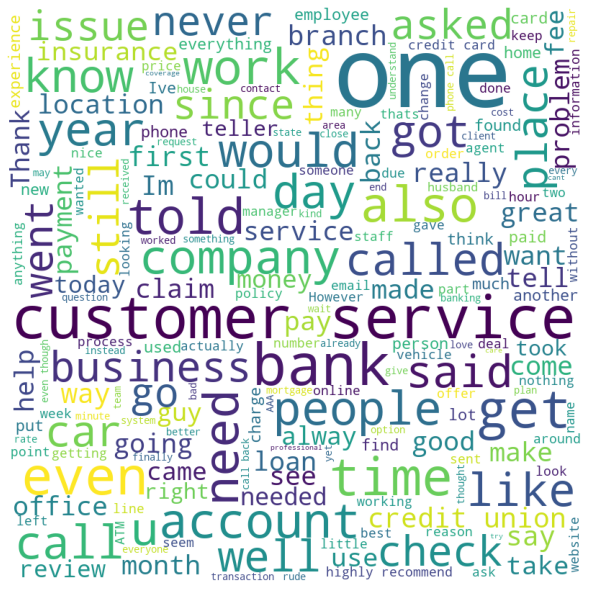

In [15]:
# Function to plot word cloud 

def plotWorldCloud(df,stopwords,maxWords=500):
    comment_words = '' 
    # iterate through the csv file 
    for val in yelp_data['text']: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 
        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords,
                    max_words = maxWords,
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image					 
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()


stop_words = set(stopwords.words('english'))
plotWorldCloud(yelp_data['text'],stop_words,200)

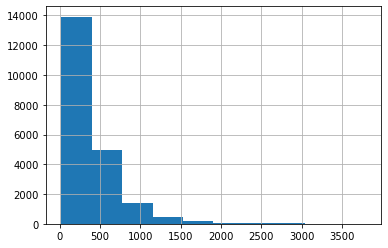

In [16]:
yelp_data['text'].str.len().hist()

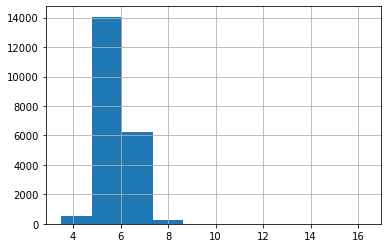

In [17]:
#Plotting average word length in each sentence in headline
yelp_data['text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

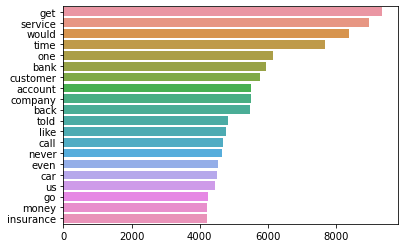

In [18]:
#We are plotting the frequency of most common words in Headline.
corpus=[]
new= yelp_data['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

stop=set(stopwords.words('english'))

counter=collections.Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:20]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

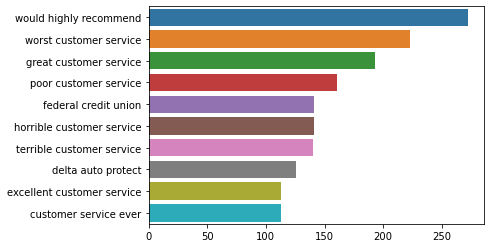

In [19]:
#Plotting the top n-grams of Title Keeping n=3
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]


top_n_bigrams=get_top_ngram(yelp_data['text'],3)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)


In [20]:
#Split train test for testing the model later
vld_size=0.15
X_train, X_valid, y_train, y_valid = train_test_split(yelp_data['text'], data['business_id'], test_size = vld_size) 

# Create two tables of user,text and business,text

In [21]:
userid_df = yelp_data[['user_id','text']]
business_df = yelp_data[['business_id', 'text']]

In [22]:
userid_df.head()

,user_id,text
0,Wshkpj8aHWuzIeca1QxWTA,positively LIVIDI went check account balance s...
1,JjX-bYG0O5B21fklcZhmog,business parents exhusband son accounts credit...
2,duKhEm4zoR5G2nllvoxqgQ,walking Delaware Ave looking ATM cup coffee wa...
3,1JnmT8hfK-amrWAy8D07cQ,husband working EF year handle book keeping tr...
4,NgnhuUc1nVB6cVl2q9MQFg,Easy tellers great Generally problem talking e...


In [23]:
userid_df[userid_df['user_id']=='Wshkpj8aHWuzIeca1QxWTA']['text']

0        positively LIVIDI went check account balance s...
13483    read troubles TD Ive ventured Citizens recomme...
14013    Hate hate hate hateLet preface fact could keep...
Name: text, dtype: object

In [24]:
userid_df[userid_df['user_id']=='NgnhuUc1nVB6cVl2q9MQFg']['text']

4        Easy tellers great Generally problem talking e...
12498    bank lobby closed whole time virus banks fully...
19568    far great experience sitting owner firm took p...
Name: text, dtype: object

In [25]:
business_df.head()

,business_id,text
0,R-HCwu9UbasUudG1yTM1Ow,positively LIVIDI went check account balance s...
1,PGDRRyplRKHAixBZSBLseA,business parents exhusband son accounts credit...
2,ggJXlslLYndvE7n3hgJBCQ,walking Delaware Ave looking ATM cup coffee wa...
3,6e85By5Jy7MMnW2cEaGv4A,husband working EF year handle book keeping tr...
4,Q1-bq8MLTht0lqFx_pYuKg,Easy tellers great Generally problem talking e...


# Joining the text with each user_id and business_id

In [26]:
userid_df = userid_df.groupby('user_id').agg({'text': ' '.join})
business_df = business_df.groupby('business_id').agg({'text': ' '.join})

In [27]:
userid_df.head()

,text
user_id,
--2vR0DIsmQ6WfcSzKWigw,Auf unserem Rundgang durch das historische Phi...
--SGeZ_Snw9VzWihJSfE-Q,Mark helped us three different mortgages helpe...
--TeOGdHURVrm_r6YmiMaA,met agent today life insurance policy parents ...
--_H9j6ggxvqhh9nPofZwg,comes saving money care legitmate business goi...
-0-d23Js4uvaf5HZlxa-1g,waited 15 hrs close safe deposit box thats emp...


In [28]:
userid_df.loc['Wshkpj8aHWuzIeca1QxWTA']['text']

'positively LIVIDI went check account balance see overdraft fee 220How could happen card never declined two large fees deducted accountI called TD sat hold 45 MINUTES kind time Granted guy nice helpful never mentioned anything wait time brought asked fees said aware TD Banks new policy insufficient funds card declined run charged overdraft feeOH THANK TELLING JERKI many salty words unacceptable public domain Ill stop nowNeedless say switching banksSort UPDATEI thought Yelpers would like know last night depositing cash account via ATM flipped camerasTAKE TD read troubles TD Ive ventured Citizens recommendation boyfriendI opened account Doug helping open incredibly accommodating try sugar coat anything told facts even showed tricks get account avoid bad thingsThis account hours making well see feel Citizens Ive gotten feel system Hate hate hate hateLet preface fact could keep money mattress would hate banks hate bs comes along Choosing bank really choosing lesser 100s evilsThe fuckers Ci

# Using Tfidf Vectorizer with 5000 Features (represent 88% of all words)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
#userid vectorizer
userid_vectorizer = TfidfVectorizer(tokenizer = WordPunctTokenizer().tokenize, max_features=5000)
userid_vectors = userid_vectorizer.fit_transform(userid_df['text'])
userid_vectors.shape

(18673, 5000)

In [31]:
userid_vectors

<18673x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 876639 stored elements in Compressed Sparse Row format>

In [32]:
#Business id vectorizer
businessid_vectorizer = TfidfVectorizer(tokenizer = WordPunctTokenizer().tokenize, max_features=5000)
businessid_vectors = businessid_vectorizer.fit_transform(business_df['text'])
businessid_vectors.shape

(1487, 5000)

# Matrix Factorization

In [33]:
userid_rating_matrix = pd.pivot_table(yelp_data, values='stars', index=['user_id'], columns=['business_id'])
userid_rating_matrix.shape

(18673, 1487)

In [34]:
userid_rating_matrix.head()

business_id,-2Tm0VU-tcatBp-SCZsuZg,-4I0u12gYWIToYmdeyxpeQ,-ENIvUeumwfMA-c10TYm0w,-GrNTC-lK9s6aTknOBBVMw,-H89PQSv6MGXFvWJBCCeAg,-JWVHrc63I-3KXOGxWYWlA,-JWoLstXfCRhgIUpiIYcag,-PHMBu7ig7rQrs0HavxYAg,-Q907y-mgLRlUN5Nb5Xygw,-TO-KQXMbQ0_G6v6DJDb4w,...,zTEI7sDIZOPJhFb4Odjxmw,zUD1vgR-Kdpy8uIhZGWcnA,zWyat7t4tCN2Q5CAMM7uZA,z_hFHAuhsv8k17vDZcZqFA,zb5CV8ElJnEEE546Ebk-Ew,zhBe6PgEY9KzJ356J5Oo8w,zhRwXJavf4jV0rlTBeSaUA,zjuUgiVXTCfr7-mJOetJlA,zknFyqCDSLKVw50XvvhSiw,zmPRS6bjajqsyeuRVi4TKA
user_id,,,,,,,,,,,,,,,,,,,,,
--2vR0DIsmQ6WfcSzKWigw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--SGeZ_Snw9VzWihJSfE-Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--TeOGdHURVrm_r6YmiMaA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--_H9j6ggxvqhh9nPofZwg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-0-d23Js4uvaf5HZlxa-1g,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
user = pd.DataFrame(userid_vectors.toarray(), index=userid_df.index, columns=userid_vectorizer.get_feature_names())
business = pd.DataFrame(businessid_vectors.toarray(), index=business_df.index, columns=businessid_vectorizer.get_feature_names())

In [36]:
user.head()

,0,1,10,100,1000,10000,100000,1015,10am,10k,...,yr,yrs,zach,zander,zelle,zero,zip,zone,­,​
user_id,,,,,,,,,,,,,,,,,,,,,
--2vR0DIsmQ6WfcSzKWigw,0.0,0.0,0.0,0.069352,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--SGeZ_Snw9VzWihJSfE-Q,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--TeOGdHURVrm_r6YmiMaA,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--_H9j6ggxvqhh9nPofZwg,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-0-d23Js4uvaf5HZlxa-1g,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Gradient Decent Optimization

In [37]:
def matrix_factorization(R, user, business, steps=25, gamma=0.001,lamda=0.02):
    for step in range(steps):
        for i in R.index:
            for j in R.columns:
                if R.loc[i,j]>0:
                    eij=R.loc[i,j]-np.dot(user.loc[i],business.loc[j])
                    user.loc[i]=user.loc[i]+gamma*(eij*business.loc[j]-lamda*user.loc[i])
                    business.loc[j]=business.loc[j]+gamma*(eij*business.loc[i]-lamda*user.loc[j])
        e=0
        for i in R.index:
            for j in R.columns:
                if R.loc[i,j]>0:
                    e= e + pow(R.loc[i,j]-np.dot(user.loc[i],business.loc[j]),2)+lamda*(pow(np.linalg.norm(user.loc[i]),2)+pow(np.linalg.norm(business.loc[j]),2))
        if e<0.001:
            break
        
    return user,business

In [38]:
#%%time
#user, business = matrix_factorization(userid_rating_matrix, user, business, steps=25, gamma=0.001,lamda=0.02)

In [39]:
business.head()

,0,1,10,100,1000,10000,100000,1015,10am,10k,...,yr,yrs,zach,zander,zelle,zero,zip,zone,­,​
business_id,,,,,,,,,,,,,,,,,,,,,
-2Tm0VU-tcatBp-SCZsuZg,0.0,0.0,0.004945,0.026200,0.008725,0.0,0.012577,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
-4I0u12gYWIToYmdeyxpeQ,0.0,0.0,0.030137,0.039917,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
-ENIvUeumwfMA-c10TYm0w,0.0,0.0,0.000000,0.038909,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.077186,0.0,0.0
-GrNTC-lK9s6aTknOBBVMw,0.0,0.0,0.000000,0.080801,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
-H89PQSv6MGXFvWJBCCeAg,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [40]:
business.iloc[0].sort_values(ascending=False).head(10)

pundmann      0.720832
ford          0.390609
car           0.154703
vehicle       0.148473
service       0.104163
rich          0.095866
sales         0.082604
dealership    0.074371
serviced      0.074349
buying        0.071340
Name: -2Tm0VU-tcatBp-SCZsuZg, dtype: float64

# Export Model

In [41]:
# Store user, business and vectorizer in pickle file
import pickle
output = open('yelp_recommendation_model_8.pkl', 'wb')
pickle.dump(user,output)
pickle.dump(business,output)
pickle.dump(userid_vectorizer,output)
output.close()

# Prediction for input text

In [42]:
words = "i want a good mortgage service"

In [43]:
test_df= pd.DataFrame([words], columns=['text'])
test_df['text'] = test_df['text'].apply(text_process)
test_vectors = userid_vectorizer.transform(test_df['text'])
test_v_df = pd.DataFrame(test_vectors.toarray(), index=test_df.index, columns=userid_vectorizer.get_feature_names())

predictItemRating=pd.DataFrame(np.dot(test_v_df.loc[0],business.T),index=business.index,columns=['Rating'])
topRecommendations=pd.DataFrame.sort_values(predictItemRating,['Rating'],ascending=[0])[:7]

for i in topRecommendations.index:
    print(df_business[df_business['business_id']==i]['business_name'].iloc[0])
    print(df_business[df_business['business_id']==i]['categories'].iloc[0])
    print(str(df_business[df_business['business_id']==i]['star_rating'].iloc[0])+ ' '+str(df_business[df_business['business_id']==i]['review_counts'].iloc[0]))
    print('')

Movement Mortgage
Mortgage Lenders, Mortgage Brokers, Real Estate, Financial Services, Home Services
3.0 21

Homebridge Financial Services
Financial Services, Mortgage Lenders, Real Estate, Home Services, Mortgage Brokers
4.5 22

Vinson Mortgage
Real Estate, Home Services, Financial Services, Mortgage Brokers
2.5 15

Franklin American Mortgage 
Financial Services, Mortgage Lenders, Real Estate, Home Services, Mortgage Brokers
1.5 68

VIP Mortgage
Home Services, Real Estate, Mortgage Brokers, Financial Services
3.0 7

Freedom Mortgage
Financial Services, Mortgage Lenders
1.0 10

Allied Mortgage Group
Financial Services, Mortgage Brokers, Home Services, Real Estate, Mortgage Lenders
2.5 16

